In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [12]:
# importing dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values


In [13]:
# splitting dataset into train_test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0 )

In [14]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# fitting RandomForestClassifier to train dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy" , random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
# predict testing dataset
y_pred = classifier.predict(X_test)

In [17]:
# create confusion_matrix
from sklearn.metrics  import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

print(accuracy_score(y_test,y_pred))

[[63  5]
 [ 4 28]]
0.91


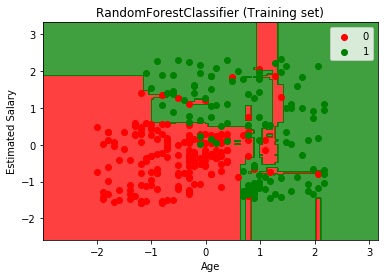

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RandomForestClassifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

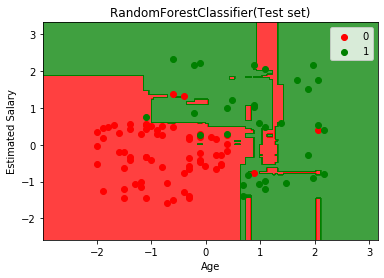

In [19]:
# Visualizing the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

#  This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#  points and the blue pixel points. contour function make the contour #between red and blue regions.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#plot the limits of the age(X1) and the estimated salary(X2) lines.

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#This loop here plots all the data points that are the real values.

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(["red", "green"])(i), label = j)


# Add the name of the plot and the labels.

plt.title('RandomForestClassifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 
